# 라이브러리 로드 및 기본 세팅

In [1]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 62 kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

# 데이콘 점수

In [4]:
# 자체 점수 : 0.6863
# 제출 점수(제출 날짜) : 0.6018544146(2022-01-07 14:31:38)

# 설정

In [5]:
# cat
# probability_threshold : 0.4869

# 순서형 특성 수치형으로 지정(4개)
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [6]:
# 제거된 특성(4개)
# 'id',
# 'contents_open_dt',
# 'person_prefer_f',
# 'person_prefer_g'

In [7]:
# 매칭 속성

In [8]:
# d_l_match_yn : 'person_prefer_d_1_l', 'contents_attribute_d_l' 매칭 여부
# d_m_match_yn : 'person_prefer_d_1_n', 'contents_attribute_d_n' 매칭 여부'
# d_s_match_yn : 'person_prefer_d_1', 'contents_attribute_d' 매칭 여부
# h_l_match_yn : 'person_prefer_h_1_l', 'contents_attribute_h_l' 매칭 여부
# h_m_match_yn : 'person_prefer_h_1_m', 'contents_attribute_h_m' 매칭 여부
# h_s_match_yn : 'person_prefer_h_1', 'contents_attribute_h' 매칭 여부

# 데이터 불러오기

In [9]:
# train = pd.read_csv('../data/df_train.csv')
# test = pd.read_csv('../data/df_test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_test.csv')

# 데이터 확인

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [11]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [13]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


# 필요 데이터 추출

## 훈련에 의미가 적은 열 제거

In [14]:
# 제거된 특성(4개)
# 'id',
# 'contents_open_dt',
# 'person_prefer_f',
# 'person_prefer_g',

In [15]:
# 삭제할 특성
pop_col = ['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g']
len(pop_col)

4

In [16]:
train = train.drop(pop_col, axis=1) 
test = test.drop(pop_col, axis=1)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   h_m_match_yn            46404 non-null  bool 
 5   h_s_match_yn            46404 non-null  bool 
 6   person_attribute_a      46404 non-null  int64
 7   person_attribute_a_1    46404 non-null  int64
 8   person_attribute_b      46404 non-null  int64
 9   person_prefer_c         46404 non-null  int64
 10  person_prefer_d_1       46404 non-null  int64
 11  person_prefer_d_2       46404 non-null  int64
 12  person_prefer_d_3       46404 non-null  int64
 13  person_prefer_e         46404 non-null  int64
 14  person_prefer_h_1       46404 non-null  int64
 15  person_prefer_h_2  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [19]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train = train.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [20]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test = test.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


## 카테고리형 특성으로 지정할 특성

In [21]:
# 원본 데이터에서 순서형 특성
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [22]:
# 순서형 특성 수치형으로 지정 : ⭕
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [23]:
a = train['person_attribute_a_a'].unique()
len(a), a

(8, array([4, 3, 0, 1, 2, 5, 6, 7]))

In [24]:
a = train['person_attribute_b'].unique()
len(a), a

(6, array([3, 4, 2, 5, 1, 0]))

In [25]:
a = train['person_prefer_e'].unique()
len(a), a

(12, array([ 8,  4,  3,  5,  6,  0,  7, 11,  9,  2,  1, 10]))

In [26]:
a = train['contents_attribute_e'].unique()
len(a), a

(12, array([ 4,  3,  5,  6,  1, 11,  8,  7,  2,  0, 10,  9]))

In [27]:
type(train.columns)

pandas.core.indexes.base.Index

In [28]:
train.columns[train.nunique() > 2]

Index(['person_attribute_a_a', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_a', 'contents_attribute_c',
       'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_m',
       'contents_attribute_e', 'contents_attribute_h', 'person_rn',
       'contents_rn', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_m', 'person_prefer_h_1_l',
       'person_prefe

In [29]:
type(train.columns[train.nunique() > 2])

pandas.core.indexes.base.Index

In [30]:
train.columns[train.nunique() > 2].tolist()

['person_attribute_a_a',
 'person_attribute_b',
 'person_prefer_c',
 'person_prefer_d_1',
 'person_prefer_d_2',
 'person_prefer_d_3',
 'person_prefer_e',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_3',
 'contents_attribute_i',
 'contents_attribute_a',
 'contents_attribute_j_a',
 'contents_attribute_c',
 'contents_attribute_l',
 'contents_attribute_d',
 'contents_attribute_m',
 'contents_attribute_e',
 'contents_attribute_h',
 'person_rn',
 'contents_rn',
 'person_prefer_d_1_n',
 'person_prefer_d_1_s',
 'person_prefer_d_1_m',
 'person_prefer_d_1_l',
 'person_prefer_d_2_n',
 'person_prefer_d_2_s',
 'person_prefer_d_2_m',
 'person_prefer_d_2_l',
 'person_prefer_d_3_n',
 'person_prefer_d_3_s',
 'person_prefer_d_3_m',
 'person_prefer_d_3_l',
 'contents_attribute_d_n',
 'contents_attribute_d_s',
 'contents_attribute_d_m',
 'contents_attribute_d_l',
 'person_prefer_h_1_m',
 'person_prefer_h_1_l',
 'person_prefer_h_2_m',
 'person_prefer_h_2_l',
 'person_prefer_h_3_m',
 'perso

In [31]:
cat_f = train.columns.tolist()
cat_f.remove('person_attribute_a_a')
cat_f.remove('person_attribute_b')
cat_f.remove('person_prefer_e')
cat_f.remove('contents_attribute_e')
cat_f.remove('target')

In [32]:
cat_f

['d_l_match_yn',
 'd_m_match_yn',
 'd_s_match_yn',
 'h_l_match_yn',
 'h_m_match_yn',
 'h_s_match_yn',
 'person_attribute_a',
 'person_prefer_c',
 'person_prefer_d_1',
 'person_prefer_d_2',
 'person_prefer_d_3',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_3',
 'contents_attribute_i',
 'contents_attribute_a',
 'contents_attribute_j_a',
 'contents_attribute_j',
 'contents_attribute_c',
 'contents_attribute_k',
 'contents_attribute_l',
 'contents_attribute_d',
 'contents_attribute_m',
 'contents_attribute_h',
 'person_rn',
 'contents_rn',
 'person_prefer_d_1_n',
 'person_prefer_d_1_s',
 'person_prefer_d_1_m',
 'person_prefer_d_1_l',
 'person_prefer_d_2_n',
 'person_prefer_d_2_s',
 'person_prefer_d_2_m',
 'person_prefer_d_2_l',
 'person_prefer_d_3_n',
 'person_prefer_d_3_s',
 'person_prefer_d_3_m',
 'person_prefer_d_3_l',
 'contents_attribute_d_n',
 'contents_attribute_d_s',
 'contents_attribute_d_m',
 'contents_attribute_d_l',
 'person_prefer_h_1_m',
 'person_prefer_h_1_l

# train, test 셋 분리

In [33]:
train.shape

(501951, 59)

In [34]:
X = train.drop(['target'], axis=1)
X.shape

(501951, 58)

In [35]:
y = train[['target']]
y.shape

(501951, 1)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, shuffle=True, stratify=y)

In [37]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((376463, 58), (125488, 58), (376463, 1), (125488, 1))

# 모델 훈련/예측

In [38]:
cat = CatBoostClassifier(random_state=0, task_type="GPU", iterations=1000, 
                         cat_features=cat_f, eval_metric='F1')

In [39]:
cat.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)
# 47s

Learning rate set to 0.043012
0:	learn: 0.6198105	test: 0.6215183	best: 0.6215183 (0)	total: 457ms	remaining: 7m 36s
100:	learn: 0.6479143	test: 0.6602426	best: 0.6640623 (24)	total: 28.4s	remaining: 4m 12s
200:	learn: 0.6543445	test: 0.6635824	best: 0.6640623 (24)	total: 57.2s	remaining: 3m 47s
300:	learn: 0.6595880	test: 0.6688754	best: 0.6688754 (300)	total: 1m 26s	remaining: 3m 20s
400:	learn: 0.6638454	test: 0.6715247	best: 0.6715989 (399)	total: 1m 54s	remaining: 2m 51s
500:	learn: 0.6672418	test: 0.6736326	best: 0.6736645 (499)	total: 2m 22s	remaining: 2m 22s
600:	learn: 0.6696785	test: 0.6758396	best: 0.6759388 (598)	total: 2m 50s	remaining: 1m 52s
700:	learn: 0.6714812	test: 0.6762474	best: 0.6762996 (697)	total: 3m 17s	remaining: 1m 24s
800:	learn: 0.6729356	test: 0.6766266	best: 0.6767736 (799)	total: 3m 43s	remaining: 55.6s
900:	learn: 0.6746601	test: 0.6767930	best: 0.6768991 (847)	total: 4m 10s	remaining: 27.5s
999:	learn: 0.6758813	test: 0.6772766	best: 0.6774888 (964)	t

In [40]:
cat.best_score_

{'learn': {'F1': 0.6759309325547025, 'Logloss': 0.6055279253870899},
 'validation': {'F1': 0.6774887821149188, 'Logloss': 0.597770242473384}}

## 자체 평가

### 기본 평가

In [41]:
val_pred = cat.predict(X_val)
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68     62777
           1       0.67      0.68      0.68     62711

    accuracy                           0.68    125488
   macro avg       0.68      0.68      0.68    125488
weighted avg       0.68      0.68      0.68    125488



In [51]:
f1_score(y_val, val_pred)

0.6774887821149188

In [42]:
from sklearn.metrics import roc_curve

In [43]:
val_pred_proba = cat.predict_proba(X_val)

In [44]:
val_pred_proba

array([[0.47759898, 0.52240102],
       [0.33091306, 0.66908694],
       [0.56676231, 0.43323769],
       ...,
       [0.76884342, 0.23115658],
       [0.89297384, 0.10702616],
       [0.33363569, 0.66636431]])

In [45]:
val_pred_proba[:,1]

array([0.52240102, 0.66908694, 0.43323769, ..., 0.23115658, 0.10702616,
       0.66636431])

### roc curve

In [46]:
from sklearn.metrics import roc_curve
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, val_pred_proba[:,1])

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.933486
1,0.000000,0.000016,0.933486
2,0.000000,0.000175,0.920078
3,0.000016,0.000175,0.918288
4,0.000016,0.000734,0.904687
...,...,...,...
51591,0.998471,0.999968,0.012749
51592,0.998471,0.999984,0.012734
51593,0.998550,0.999984,0.012616
51594,0.998550,1.000000,0.012587


In [47]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'TPRate')

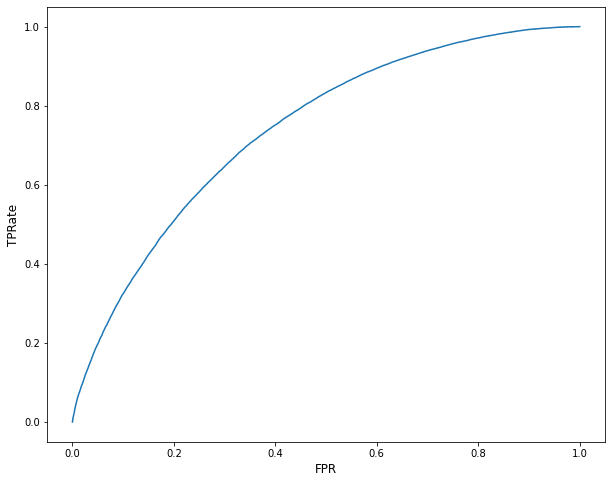

In [59]:
plt.figure(figsize=(10,8))
plt.plot(roc['FPR(Fall-out)'], roc['TPRate(Recall)'])
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPRate', fontsize=12)

### threshold제한 평가

In [52]:
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 28194 , threshold: 0.4869006643732843


In [53]:
from sklearn.metrics import roc_auc_score

pred_proba = cat.predict_proba(X_val)[:,1]
roc_score = roc_auc_score(y_val, pred_proba)

In [54]:
roc_score

0.7407428383319561

In [56]:
val_pred_th =  (cat.predict_proba(X_val)[:,1] >= optimal_threshold)
# 1의 예측값만 불러와도 되므로 [:,1]사용
val_pred_th = val_pred_th.astype(int)
val_pred_th

array([1, 1, 0, ..., 0, 0, 1])

In [57]:
f1_score(y_val, val_pred_th)

0.6863500678426051

## test 예측

In [60]:
pred =  (cat.predict_proba(test)[:,1] >= optimal_threshold)
# 1의 예측값만 불러와도 되므로 [:,1]사용
pred = pred.astype(int)
pred

array([0, 0, 0, ..., 1, 1, 1])

# 제출파일 불러오기

In [61]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [62]:
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# 제출파일 생성

In [63]:
sub['target'] = pred

In [64]:
sub['target'].value_counts()

0    26785
1    19619
Name: target, dtype: int64

In [65]:
# sub.to_csv('sub_ver4.1.csv', index=False)
sub.to_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver4.1.csv', index=False)

# 코드 마지막